# **Лабораторная работа №4**
## **Многомерная регрессия**
## **Вариант 4: Суточное испарение с поверхности земли**
Набор данных содержит информацию о суточном количестве испарения с по
верхности земли, которое может быть представлено как функция температуры почвы
и воздуха. Имеется 25 строк данных и 9 столбцов.

Набор данных включает следующие атрибуты:
*   I – индекс;
*   A0 – 1;
*   A1 – максимальная температура грунта;
*   A2 – минимальная температура грунта;
*   A3 – показатель среднесуточной температуры грунта;
*   A4 – максимальная температура воздуха;
*   A5 – минимальная температура воздуха;
*   A6 – показатель среднесуточной температуры воздуха;
*   B – суточное количество выпаренной воды.



## Импортируем библиотеки и загружаем данные

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("x25.csv")
df.head()

,Number,A0,A1,A2,A3,A4,A5,A6,B
0,1,1,84,65,147,85,59,151,30
1,2,1,84,65,149,86,61,159,34
2,3,1,79,66,142,83,64,152,33
3,4,1,81,67,147,83,65,158,26
4,5,1,84,68,167,88,69,180,41


## Получим сводную информацию по датафрейму

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Number  25 non-null     int64
 1   A0      25 non-null     int64
 2   A1      25 non-null     int64
 3   A2      25 non-null     int64
 4   A3      25 non-null     int64
 5   A4      25 non-null     int64
 6   A5      25 non-null     int64
 7   A6      25 non-null     int64
 8   B       25 non-null     int64
dtypes: int64(9)
memory usage: 1.9 KB


## Проверим наличие пропущенных значений и выбросов

In [3]:
# проверяем на пропущенные значения
print(df.isnull().sum())

Number    0
A0        0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
B         0
dtype: int64


## Заменяем категориальные значения числовыми

In [4]:
(unique, counts) = np.unique(df['A6'], return_counts=True)
print('Unique values of the variable: ', unique)
print('Counts: ' , counts)

Unique values of the variable:  [147 151 152 158 159 162 167 169 170 173 177 180 195 196 199 201 204 206
 208 211]
Counts:  [1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2]


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
df['A6'] = labelencoder_o.fit_transform(df['A6'])
df

,Number,A0,A1,A2,A3,A4,A5,A6,B
0,1,1,84,65,147,85,59,1,30
1,2,1,84,65,149,86,61,4,34
2,3,1,79,66,142,83,64,2,33
3,4,1,81,67,147,83,65,3,26
4,5,1,84,68,167,88,69,11,41
5,6,1,74,66,131,77,67,0,4
6,7,1,73,66,131,78,69,4,5
7,8,1,75,67,134,84,68,4,20
8,9,1,84,68,161,89,71,12,31
9,10,1,86,72,169,91,76,17,38


## Разделяем данные на признаки и целевую переменную

In [6]:
y = df['A3']
X = df.drop('A3', axis=1)
# убедимся, что данные в нужном нам формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [7]:
X.head()

,Number,A0,A1,A2,A4,A5,A6,B
0,1,1,84,65,85,59,1,30
1,2,1,84,65,86,61,4,34
2,3,1,79,66,83,64,2,33
3,4,1,81,67,83,65,3,26
4,5,1,84,68,88,69,11,41


## Разделяем данные на обучающую и тестовую выборку

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Применяем операцию нормализации для численной устойчивости

In [9]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler
# и создания модели линейной регрессии
from sklearn.linear_model import LinearRegression

# создадим обхект класса StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

## Масштабируем признаки обучающей выборки

In [10]:
X_train_scaled = scaler.fit_transform(X_train)

# убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([12.55555556,  1.        , 84.5       , 69.11111111, 88.22222222,
        69.38888889, 10.27777778, 32.61111111]),
 array([ 7.28943087,  1.        ,  5.20949987,  2.72618759,  4.23681688,
         4.46142589,  5.81956046, 13.88499946]))

## Обучаем модель линейной регрессии

In [11]:
# применим масштабирование данные для обучения модели линейной регрессии
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

## Делаем прогноз на основе данных тестирования

In [12]:
# преобразуем тестовые данные с использованием среднего и СКО, расчитанных на обучающей выборке
# так тестовые данные не повлияют на обучение модели, и мы избежим утечки данных
X_test_scaled = scaler.transform(X_test)

# сделаем прогноз на стандартизированных тестовых данных
y_pred = model.predict(X_test_scaled)
# выведем первые пять значений с помощью диапозона индексов
y_pred[:5]

array([133.96314369, 140.38960465, 139.62779914, 157.69232385,
       181.99292915])

In [13]:
# импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error

# сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 3.865929180221283


In [14]:
# посмотрим на еще одну метрику - коэффициент детерминации R2
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.96


In [15]:
# оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_test_scaled, y_test)

0.9571037363579057

## Итоговое уравнение

In [17]:
# Коэффициенты
print ('Coefficients: ', model.coef_)

Coefficients:  [ 4.47362532e-01 -5.32907052e-15  1.43399913e+01  1.44116529e+00
  1.65789001e-02  4.24351652e+00 -1.02620869e+00 -1.90083991e+00]


In [18]:
# Свободны член
print ('Intercept: ', model.intercept_)

Intercept:  161.5


## Оценим виляние признаков на целевую переменную

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
df['A6'] = labelencoder_o.fit_transform(df['A6'])
df

,Number,A0,A1,A2,A3,A4,A5,A6,B
0,1,1,84,65,147,85,59,1,30
1,2,1,84,65,149,86,61,4,34
2,3,1,79,66,142,83,64,2,33
3,4,1,81,67,147,83,65,3,26
4,5,1,84,68,167,88,69,11,41
5,6,1,74,66,131,77,67,0,4
6,7,1,73,66,131,78,69,4,5
7,8,1,75,67,134,84,68,4,20
8,9,1,84,68,161,89,71,12,31
9,10,1,86,72,169,91,76,17,38


In [22]:
df.corr()

,Number,A0,A1,A2,A3,A4,A5,A6,B
Number,1.000000,NaN,0.511964,0.568470,0.605785,0.535771,0.446804,0.549773,0.275397
A0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1,0.511964,NaN,1.000000,0.746955,0.948661,0.926858,0.504885,0.825019,0.893305
A2,0.568470,NaN,0.746955,1.000000,0.870634,0.784217,0.847040,0.854459,0.605940
A3,0.605785,NaN,0.948661,0.870634,1.000000,0.928269,0.683496,0.892807,0.817340
A4,0.535771,NaN,0.926858,0.784217,0.928269,1.000000,0.625665,0.909476,0.850997
A5,0.446804,NaN,0.504885,0.847040,0.683496,0.625665,1.000000,0.830702,0.454402
A6,0.549773,NaN,0.825019,0.854459,0.892807,0.909476,0.830702,1.000000,0.767554
B,0.275397,NaN,0.893305,0.605940,0.817340,0.850997,0.454402,0.767554,1.000000


## Визуализация результатов регрессии

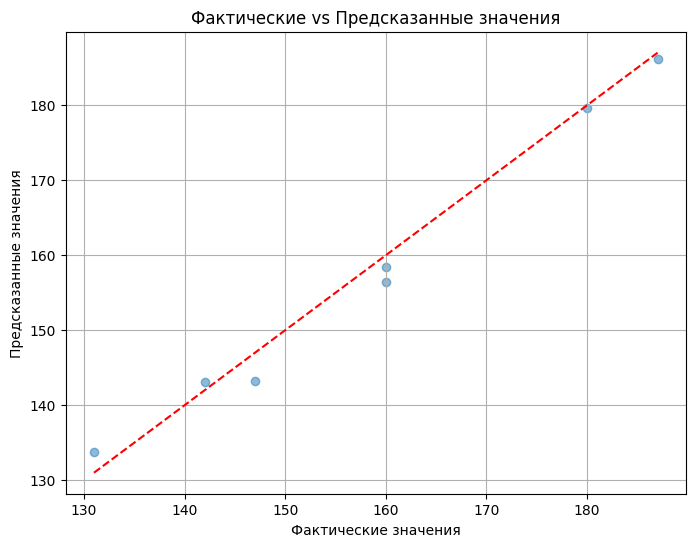

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

## Остатки регресиии (Residuals Plot)

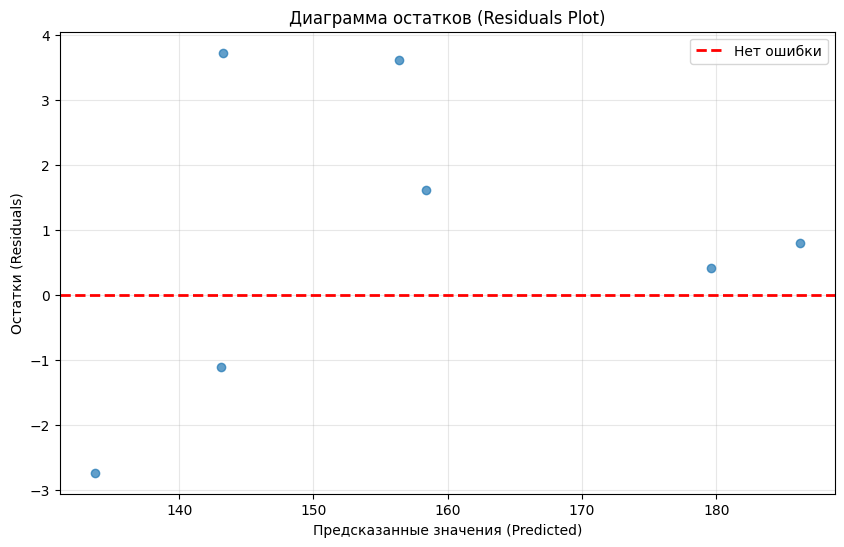

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel("Предсказанные значения (Predicted)")
plt.ylabel("Остатки (Residuals)")
plt.title("Диаграмма остатков (Residuals Plot)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()